In [7]:
library(TDA)
library(repr)
library(stringr)
library("scatterplot3d")

#### Setup Ripser

In [27]:
## Parse raw output from Ripser
parseOutput = function( output ){
    
    ## Number of intervals by dimension
    indices            = grep( "persistence intervals in dim " , output , value = FALSE )
    maxDimension       = length( indices ) - 1
    indices            = c( indices , length( output ) )
    
    ## Convert output in matrix
    diagram = matrix(, ncol = 3, nrow = 0 )
    
    ## Loop each group of intervals by dimension
    for( dim in 0:maxDimension ){
        
        ## Select intervals
        if( dim == maxDimension ){
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] ) ]
        }else{
            intervals = output[ ( indices[ dim + 1 ] + 1):( indices[ dim + 2 ] - 1 ) ]
        }
        
        ## Removed lines from output
        intervals = grep( "\\[\\d*\\.?\\d+\\,\\d*\\.?\\d+\\)" , intervals , value = TRUE )
        
        ## Remove punctuation from intervals
        intervals = gsub( "(\\s|\\[|\\))" , "" , intervals )
        
        ## Split interval and convert to numeric
        intervals = as.numeric( unlist( strsplit( intervals , "," ) ) )
        
        ## Convert ouput in matrix
        intervals = matrix( intervals , ncol = 2 , byrow = T )
        
        ## Add dimension column
        intervals = cbind( rep( dim , nrow( intervals ) ) , intervals )
        
        ## Add intervals to diagram
        diagram = rbind( diagram, intervals )
        
    }
    
    ## Format matrix to diagram format
    colnames( diagram ) = c( "dimension" , "Birth" , "Death" )
    
    return( diagram )    
}

## Calculate rips diagram using Ripser library
ripserDiag = function( X, dimension, threshold, format = "point-cloud" ){
    
    # Ripser likes to read files in, so use a temporary file
    f = tempfile()
    write.table(X, f, col.names = FALSE, row.names = FALSE)
    
    ## Set parameters as text
    dimension = as.character( dimension )
    threshold = as.character( threshold )
    
    ## Run Ripser using system command
    ripserOut = system2("/home/labmember/ripser/ripser", args = c("--dim", dimension, "--threshold", threshold, "--format", format , f), stdout = TRUE)
    
    return( parseOutput( ripserOut ) )
}

#### Synthetic Data: Points on a circle

In [53]:
X <- circleUnif(n = 15)

#### Compute Vietoris-Rips and Alpha complexes

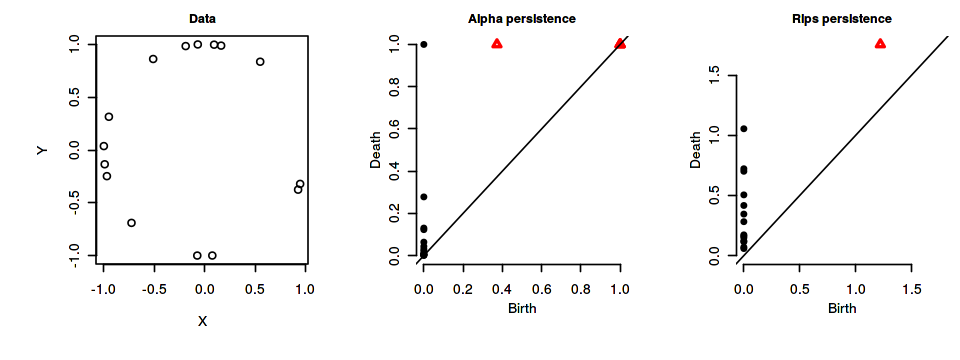

In [57]:
DiagAlphaCmplx = alphaComplexDiag(X, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(X, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(X, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

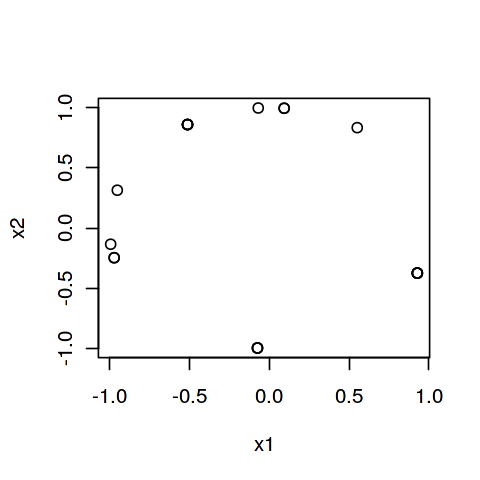

In [64]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [79]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 19

In [84]:
str(DiagAlphaCmplx$cycleLocation)

List of 19
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.0727 0.9271 -0.9974 -0.3747
 $ : num [1:2, 1, 1:2] 0.0763 -0.0727 -0.9971 -0.9974
 $ : num [1:2, 1, 1:2] -0.5101 -0.0727 0.8601 -0.9974
 $ : num [1:2, 1, 1:2] -0.949 -0.51 0.314 0.86
 $ : num [1:2, 1, 1:2] -0.969 -0.949 -0.247 0.314
 $ : num [1:2, 1, 1:2] -0.725 -0.969 -0.689 -0.247
 $ : num [1:2, 1, 1:2] -0.991 -0.969 -0.135 -0.247
 $ : num [1:2, 1, 1:2] 0.551 -0.51 0.834 0.86
 $ : num [1:2, 1, 1:2] -0.9993 -0.9909 0.0371 -0.1348
 $ : num [1:2, 1, 1:2] 0.0943 -0.5101 0.9955 0.8601
 $ : num [1:2, 1, 1:2] -0.0678 0.0943 0.9977 0.9955
 $ : num [1:2, 1, 1:2] 0.1636 0.0943 0.9865 0.9955
 $ : num [1:2, 1, 1:2] -0.1877 -0.0678 0.9822 0.9977
 $ : num [1:2, 1, 1:2] 0.947 0.927 -0.32 -0.375
 $ : num [1:15, 1:2, 1:2] 0.5512 0.9271 -0.0727 -0.5101 -0.969 ...
 $ : num [1:3, 1:2, 1:2] -0.51 -0.51 -0.949 -0.999 -0.949 ...
 $ : num [1:7, 1:2, 1:2] -0.9993 -0.0727 0.9271 0.9271 0.5512 ...
 $ : num [1:3, 1:2, 1:2] 0.9271 0.9271 -0.0727 -0.0727

In [85]:
DiagAlphaCmplx

$diagram
      dimension     Birth        Death
 [1,]         0 0.0000000          Inf
 [2,]         0 0.0000000 0.2778134981
 [3,]         0 0.0000000 0.0055527193
 [4,]         0 0.0000000 0.1302376145
 [5,]         0 0.0000000 0.1227235846
 [6,]         0 0.0000000 0.0198197133
 [7,]         0 0.0000000 0.0636210944
 [8,]         0 0.0000000 0.0032685276
 [9,]         0 0.0000000 0.0433459511
[10,]         0 0.0000000 0.0074048227
[11,]         0 0.0000000 0.0297168743
[12,]         0 0.0000000 0.0065702178
[13,]         0 0.0000000 0.0012229743
[14,]         0 0.0000000 0.0036524561
[15,]         0 0.0000000 0.0008466182
[16,]         1 0.3724668 1.0000000000
[17,]         1 1.0000000 1.0000000000
[18,]         1 1.0000000 1.0000000000
[19,]         1 1.0000000 1.0000000000

$birthLocation
               x1          x2
 [1,]  0.92713349 -0.37473122
 [2,] -0.07273972 -0.99735096
 [3,]  0.07629318 -0.99708543
 [4,] -0.51013018  0.86009720
 [5,] -0.94934976  0.31422130
 [6,] -0.969014

#### Plot merging events for connected components (dim 0 homology)

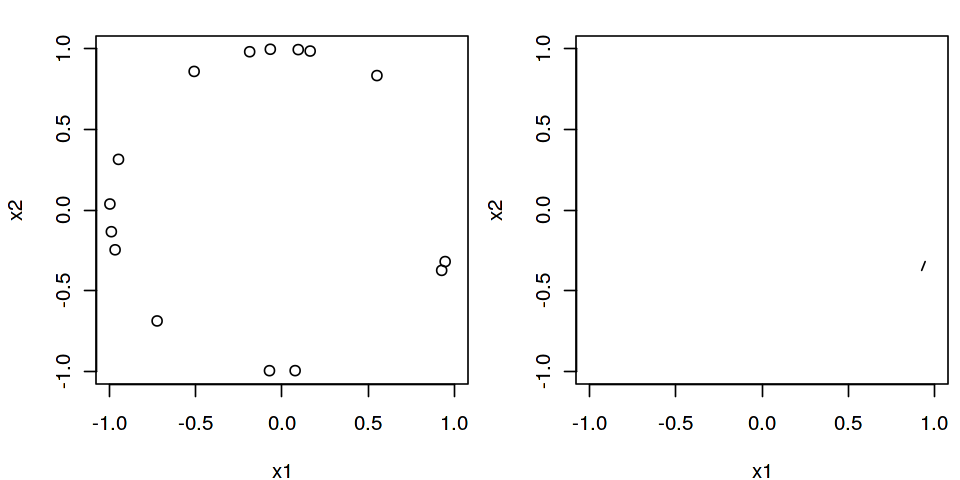

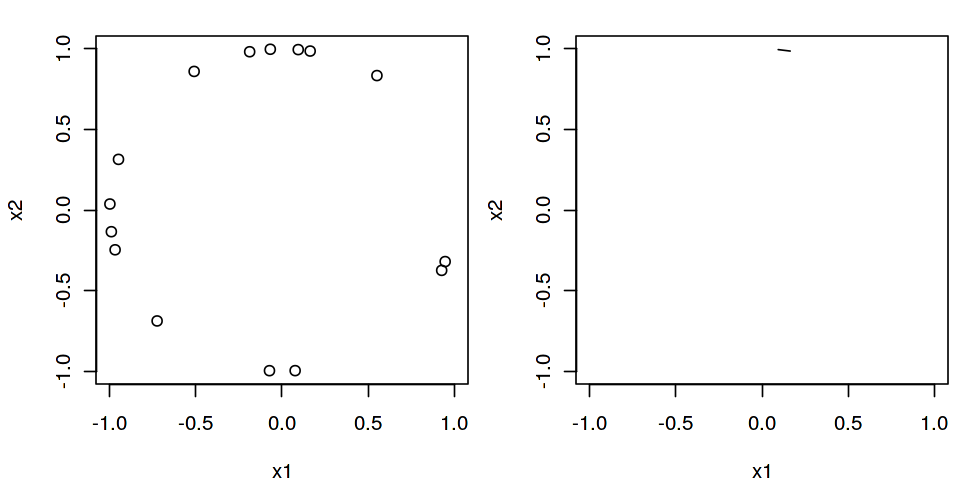

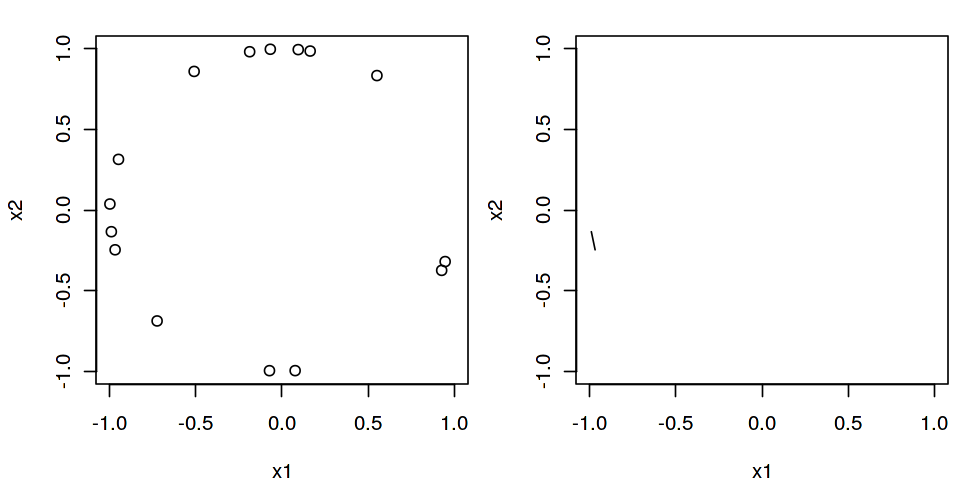

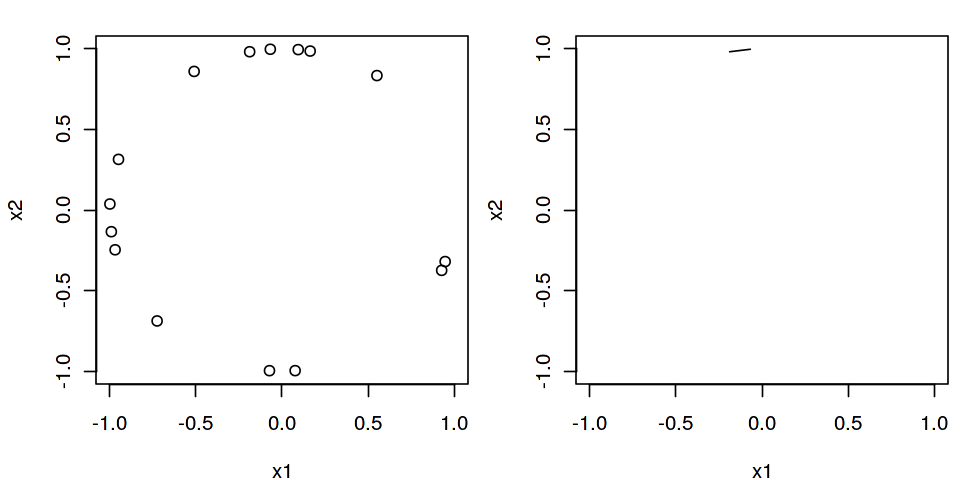

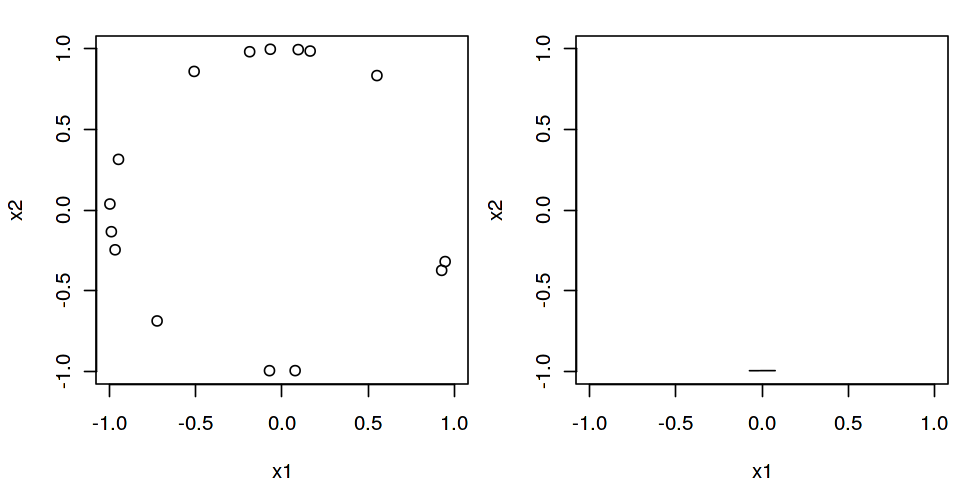

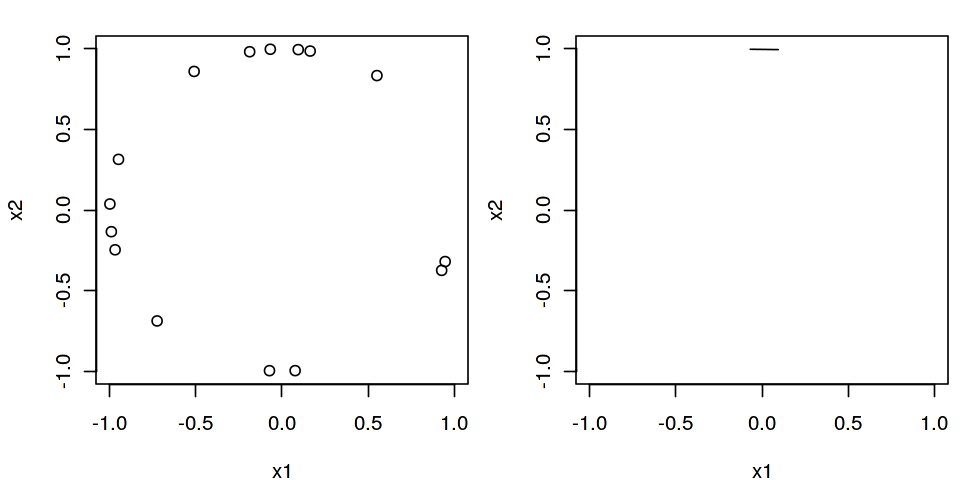

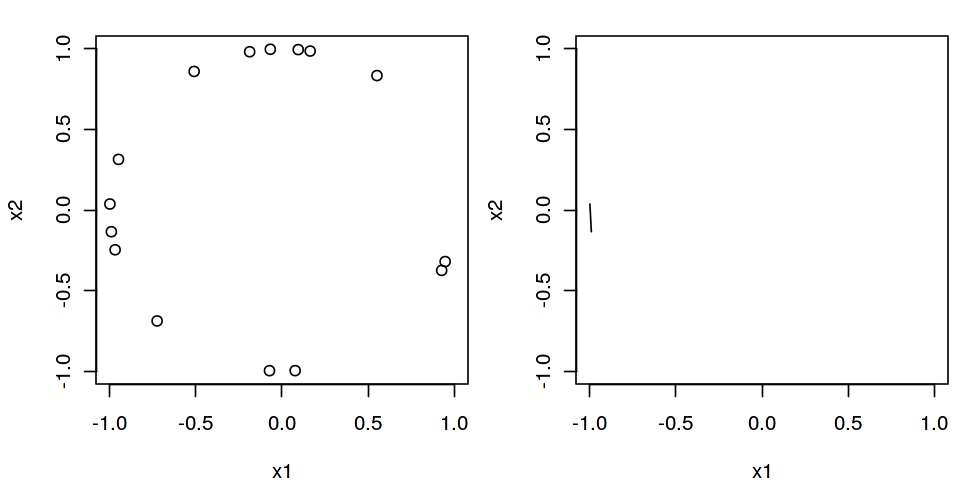

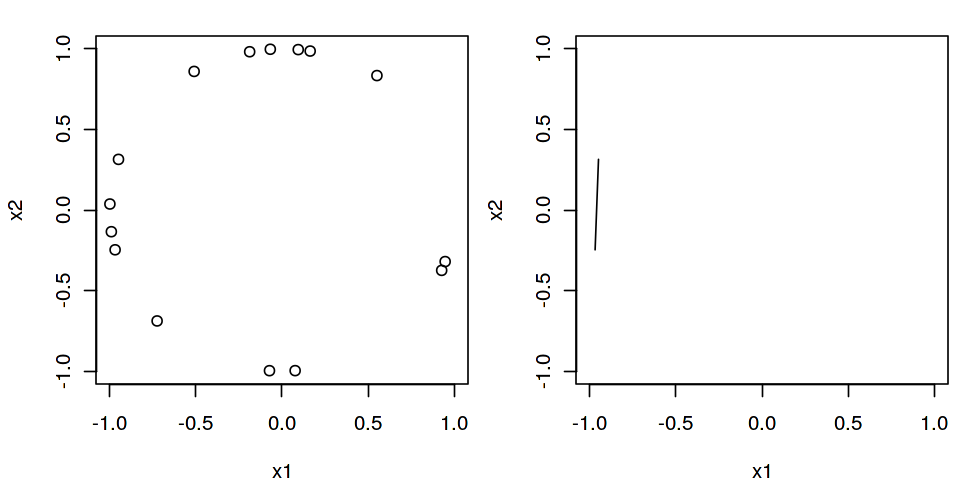

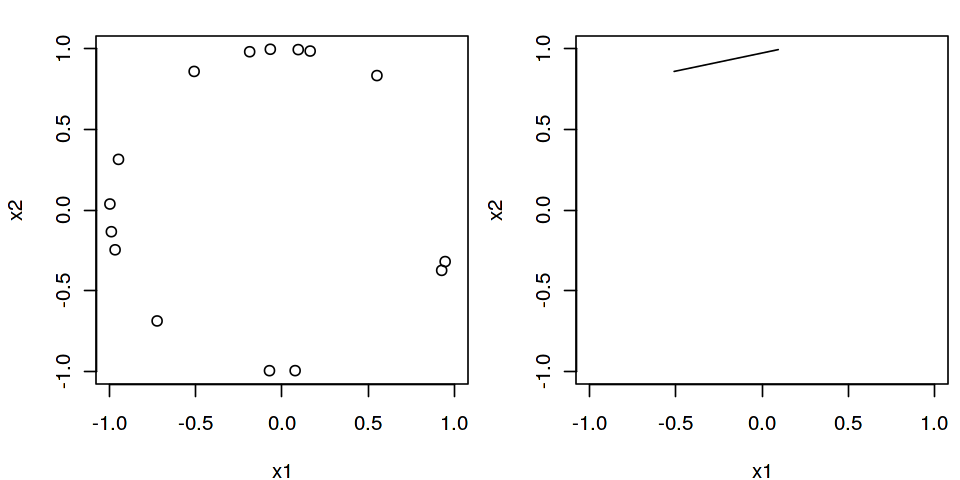

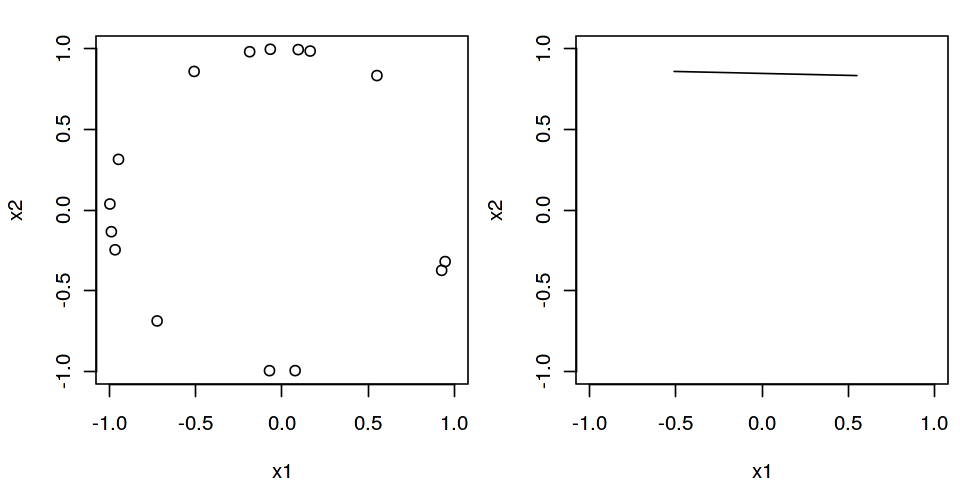

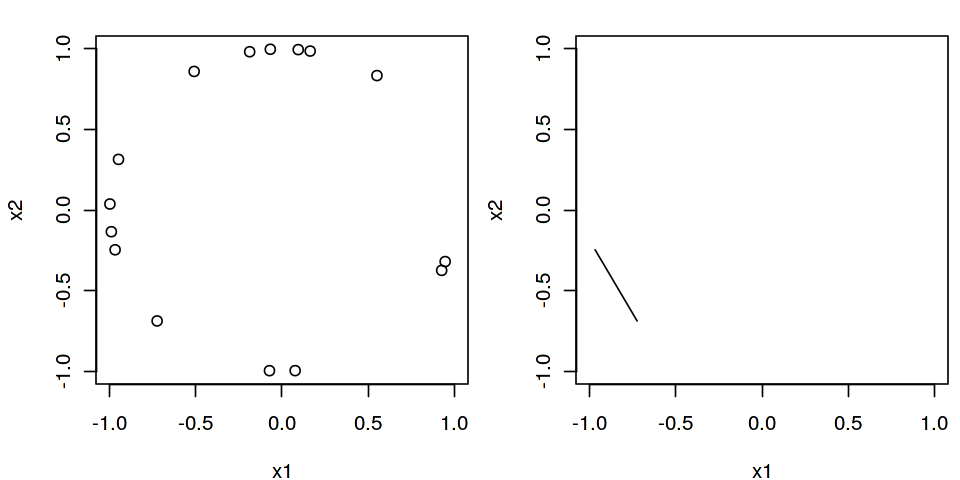

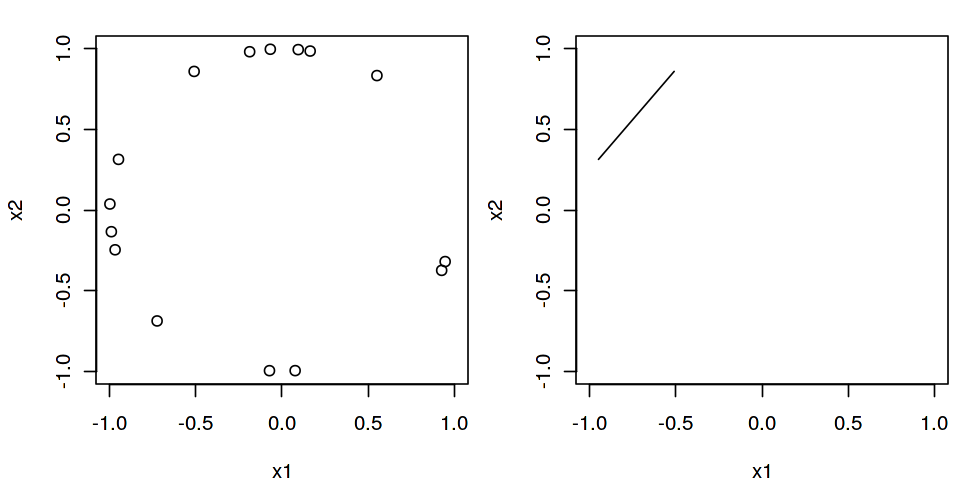

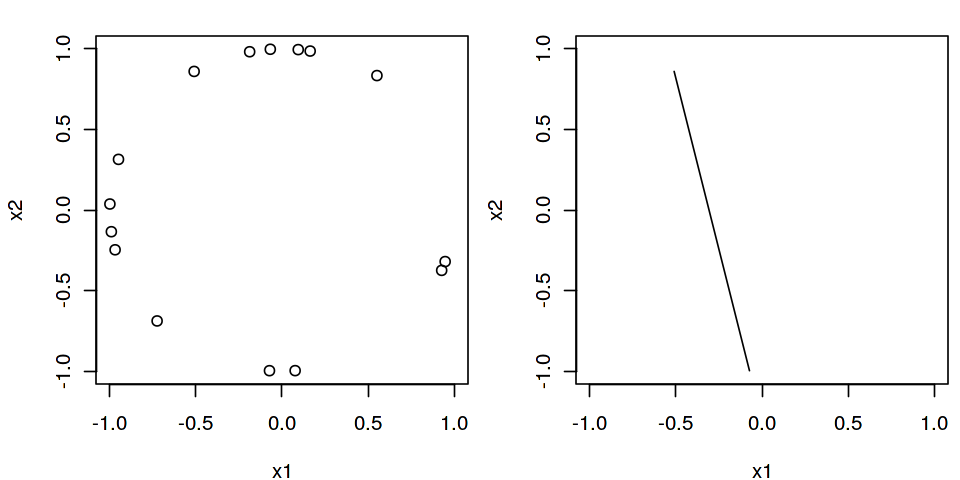

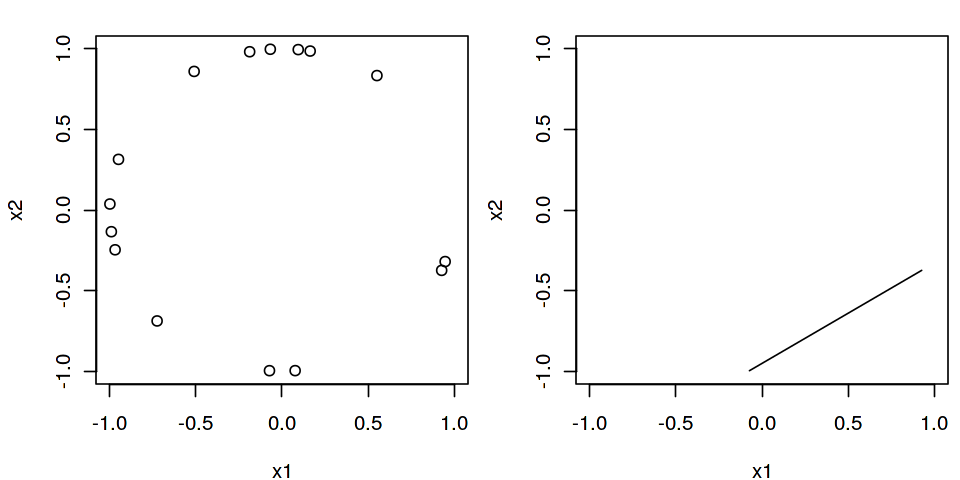

In [80]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 1){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Plot loop closing events (dim 1 homology)

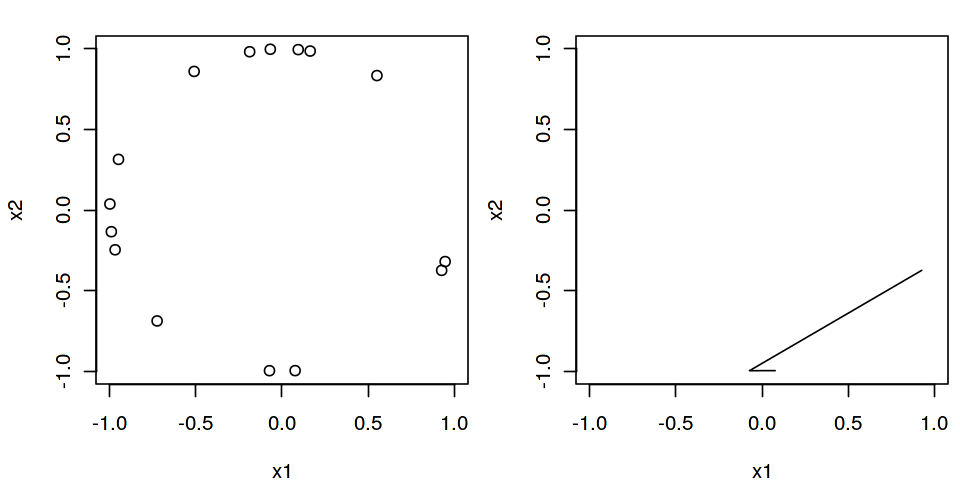

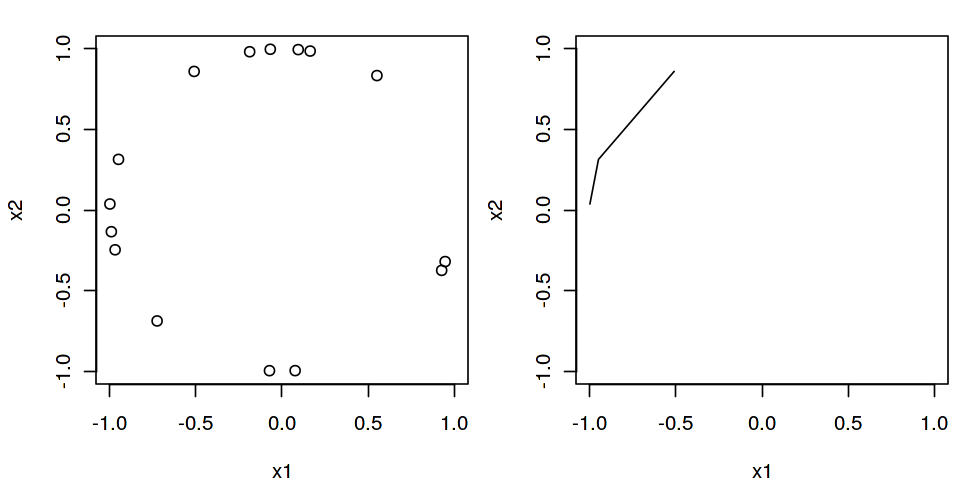

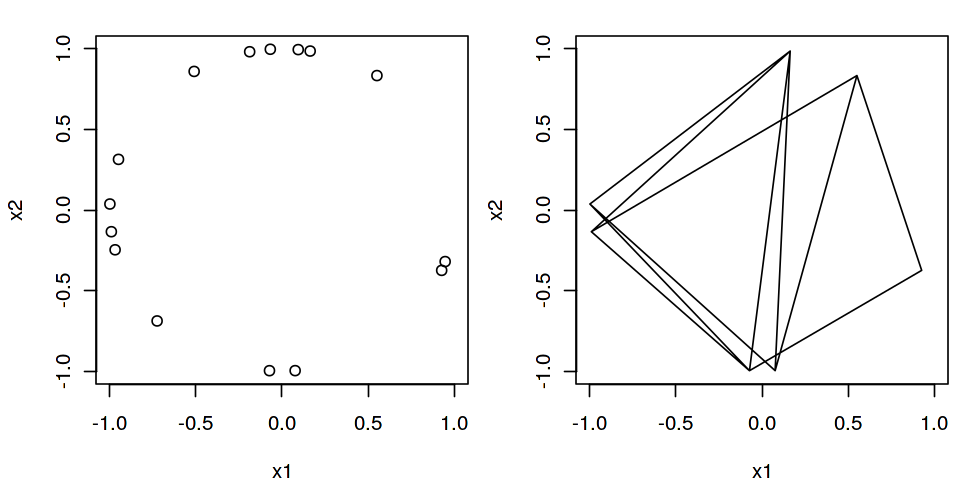

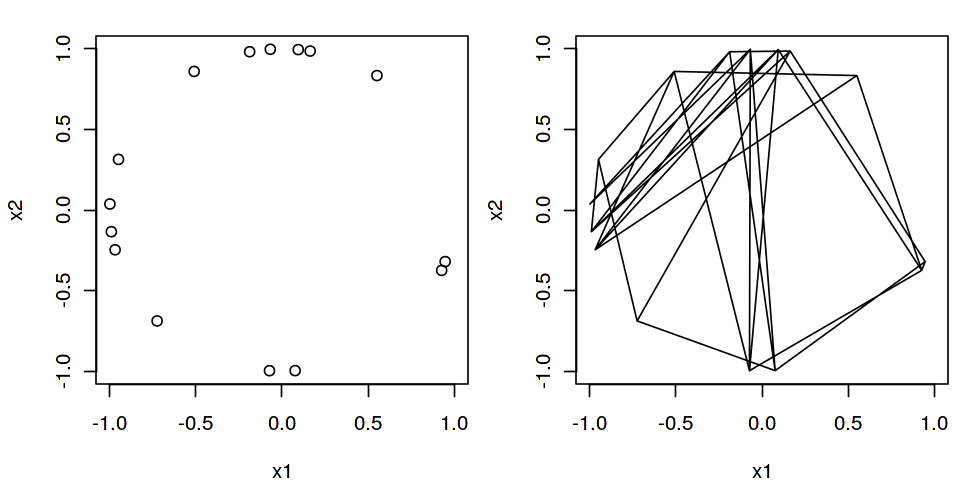

In [81]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(X,xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,1),ylim = c(-1,1))
    }
    
}

#### Synthetic Data: Points located on two circles

In [86]:
Circle1 <- circleUnif(60)
Circle2 <- circleUnif(60, r = 2) + 3
Circles <- rbind(Circle1, Circle2)

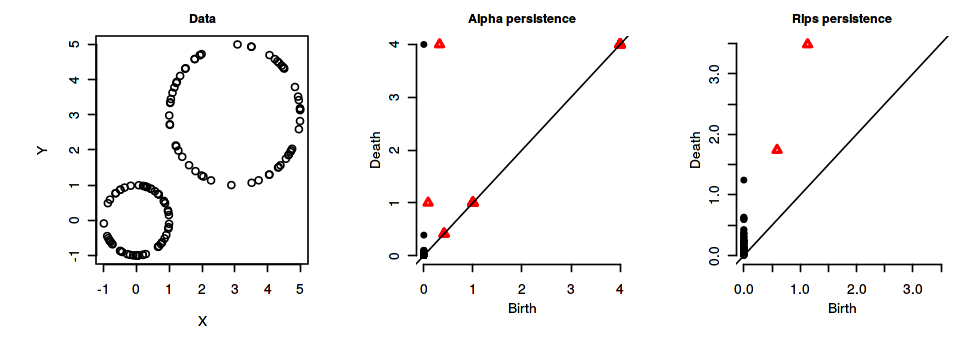

In [89]:
DiagAlphaCmplx = alphaComplexDiag(Circles, maxdimension = NCOL(X) - 1, library = c("GUDHI","DIONYSUS"), 
                                  location = TRUE, printProgress = FALSE)

rips_homology <- ripserDiag(Circles, 1, 10)
intervals = as.data.frame(rips_homology)
dim0 = intervals[intervals$dimension==0,]
dim1 = intervals[intervals$dimension==1,]

par(mfrow = c(1, 3), mai = c(0.8, 0.8, 0.3, 0.1))
options(repr.plot.width=8, repr.plot.height=3)
plot(Circles, main="Data", xlab="X", ylab="Y", cex.main=0.9)
plot(DiagAlphaCmplx[["diagram"]], main = "Alpha persistence", cex.main=0.9)
TDA::plot.diagram(rips_homology, barcode = FALSE, main = "Rips persistence", cex.main=0.9)

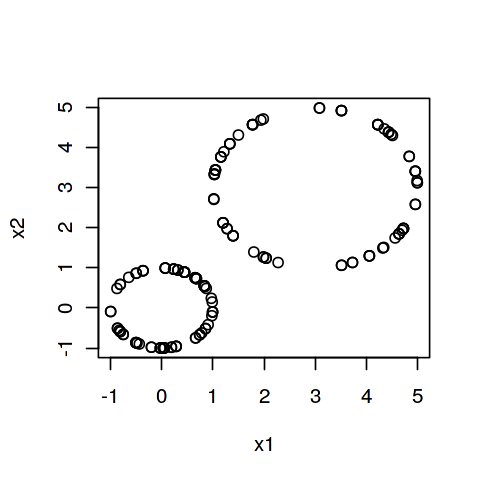

In [90]:
options(repr.plot.width=4, repr.plot.height=4)
plot(DiagAlphaCmplx$deathLocation)

In [91]:
sorted_death_eps = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$x
sorted_death_indices = sort(DiagAlphaCmplx$diagram[,3], index.return=TRUE)$ix

length(sorted_death_indices)

[1] 158

In [92]:
str(DiagAlphaCmplx$cycleLocation)

List of 158
 $ : num[0 , 0 , 1:2] 
 $ : num [1:2, 1, 1:2] -0.5 0.447 -0.866 0.894
 $ : num [1:2, 1, 1:2] 0.235 0.447 0.972 0.894
 $ : num [1:2, 1, 1:2] 0.0549 -0.5004 -0.9985 -0.8658
 $ : num [1:2, 1, 1:2] 0.045 0.0549 -0.999 -0.9985
 $ : num [1:2, 1, 1:2] 0.833 0.447 0.553 0.894
 $ : num [1:2, 1, 1:2] 0.2835 0.0549 -0.959 -0.9985
 $ : num [1:2, 1, 1:2] -0.751 -0.5 -0.661 -0.866
 $ : num [1:2, 1, 1:2] -0.481 -0.5 -0.877 -0.866
 $ : num [1:2, 1, 1:2] 0.9951 0.8332 -0.0992 0.553
 $ : num [1:2, 1, 1:2] -0.437 -0.481 -0.9 -0.877
 $ : num [1:2, 1, 1:2] 0.989 0.833 0.15 0.553
 $ : num [1:2, 1, 1:2] 0.07 0.235 0.998 0.972
 $ : num [1:2, 1, 1:2] -0.862 -0.751 -0.506 -0.661
 $ : num [1:2, 1, 1:2] 0.8577 0.9951 -0.5141 -0.0992
 $ : num [1:2, 1, 1:2] 0.68 0.447 0.734 0.894
 $ : num [1:2, 1, 1:2] -0.2 0.045 -0.98 -0.999
 $ : num [1:2, 1, 1:2] 0.664 0.858 -0.748 -0.514
 $ : num [1:2, 1, 1:2] 0.981 0.9951 -0.194 -0.0992
 $ : num [1:2, 1, 1:2] 0.675 0.68 0.737 0.734
 $ : num [1:2, 1, 1:2] 0.742 0.664

In [93]:
DiagAlphaCmplx

$diagram
       dimension      Birth        Death
  [1,]         0 0.00000000          Inf
  [2,]         0 0.00000000 4.563427e-02
  [3,]         0 0.00000000 3.571044e-03
  [4,]         0 0.00000000 7.249519e-03
  [5,]         0 0.00000000 2.457151e-05
  [6,]         0 0.00000000 1.406373e-02
  [7,]         0 0.00000000 4.680565e-03
  [8,]         0 0.00000000 2.176239e-02
  [9,]         0 0.00000000 1.192680e-04
 [10,]         0 0.00000000 1.553376e-02
 [11,]         0 0.00000000 6.355642e-04
 [12,]         0 0.00000000 1.236481e-02
 [13,]         0 0.00000000 4.359667e-03
 [14,]         0 0.00000000 9.837824e-04
 [15,]         0 0.00000000 8.799188e-03
 [16,]         0 0.00000000 4.425627e-03
 [17,]         0 0.00000000 2.471872e-03
 [18,]         0 0.00000000 4.368758e-03
 [19,]         0 0.00000000 2.297730e-03
 [20,]         0 0.00000000 7.869395e-06
 [21,]         0 0.00000000 1.909741e-03
 [22,]         0 0.00000000 2.000096e-04
 [23,]         0 0.00000000 1.721186e-05
 [24,] 

#### Plot loop closing events

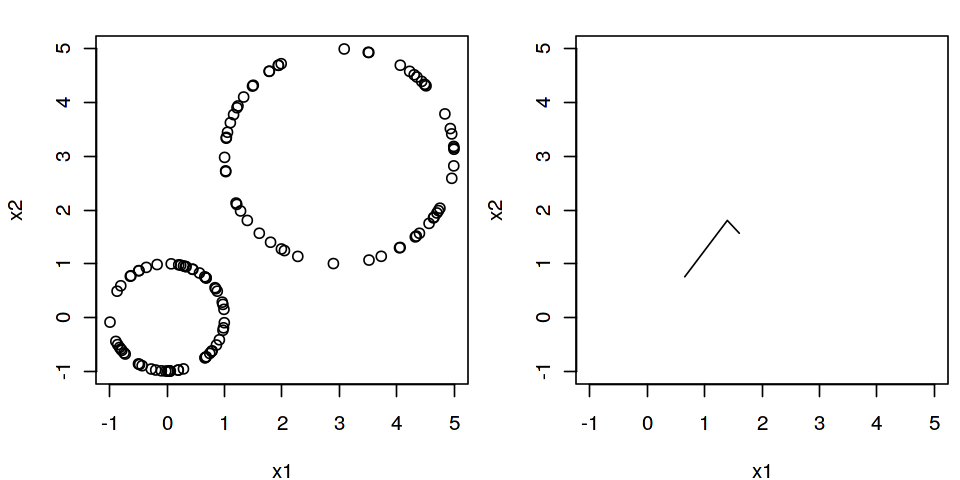

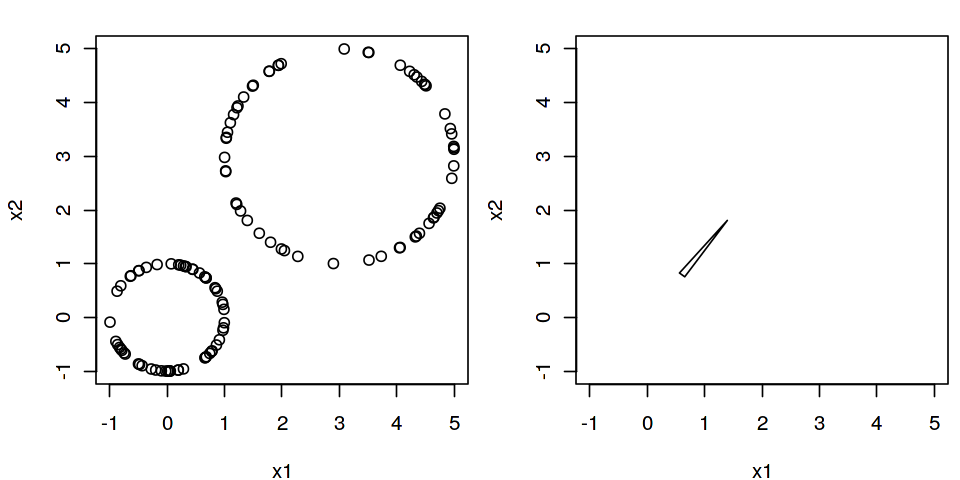

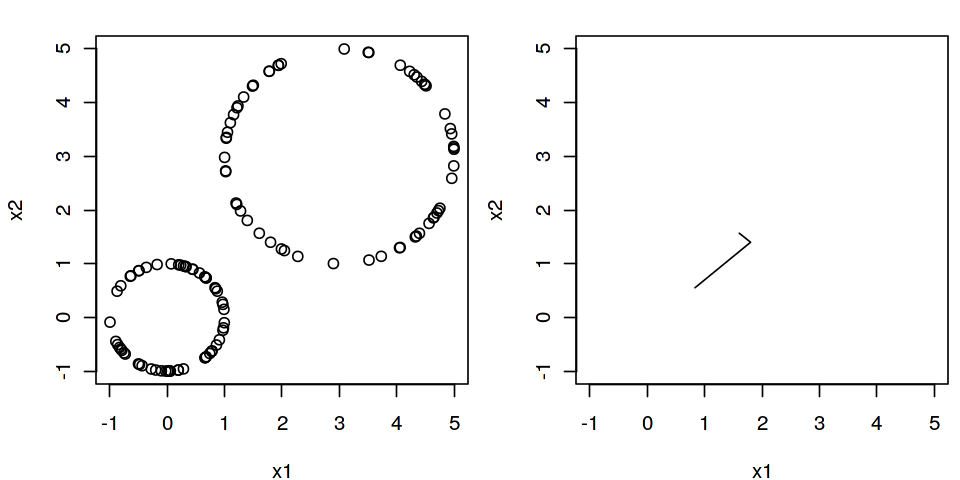

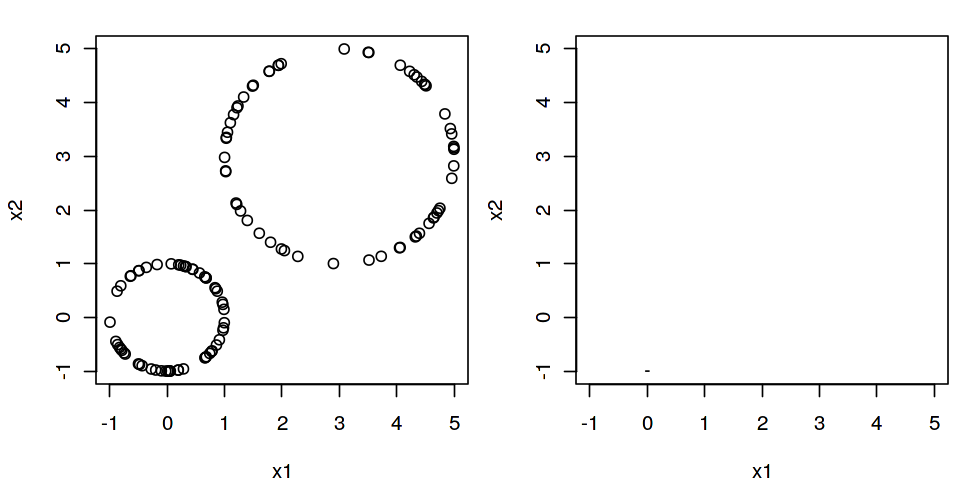

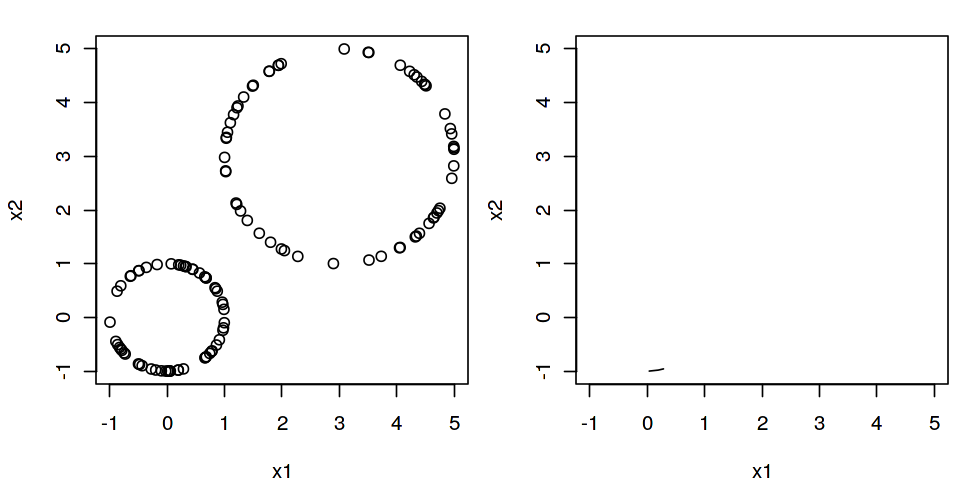

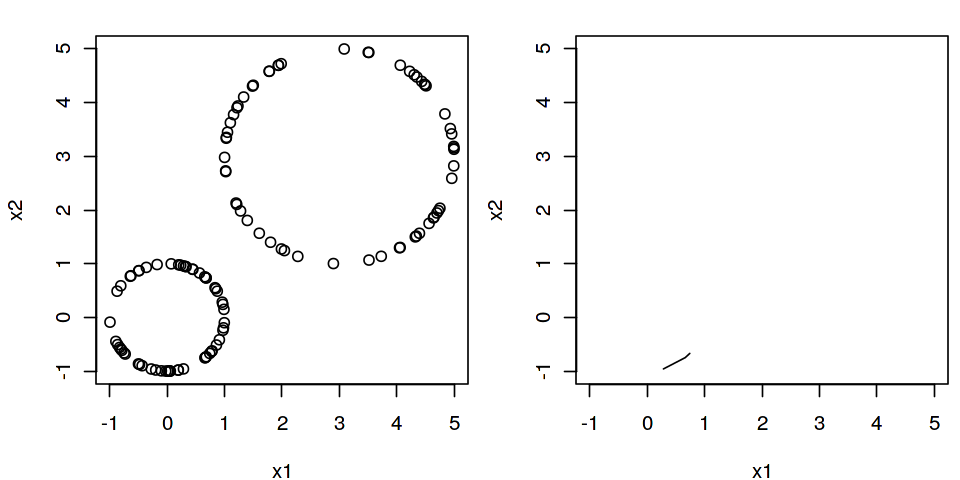

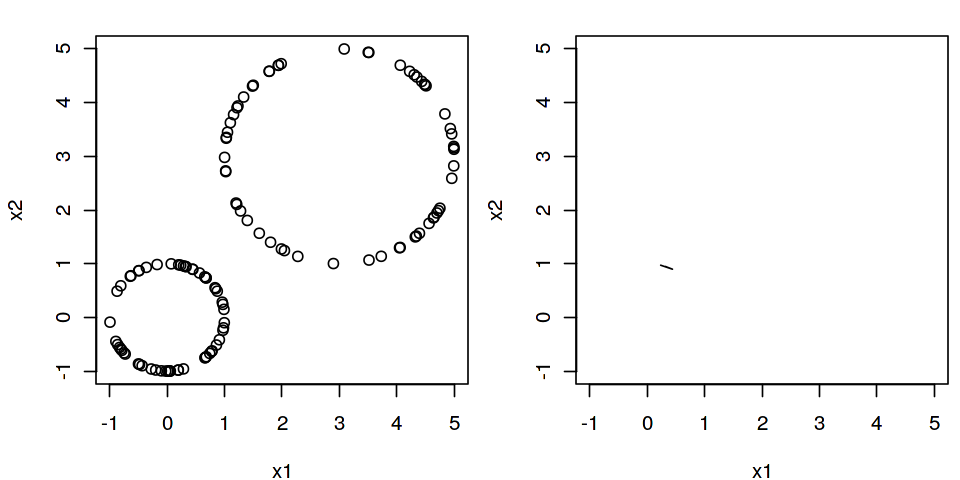

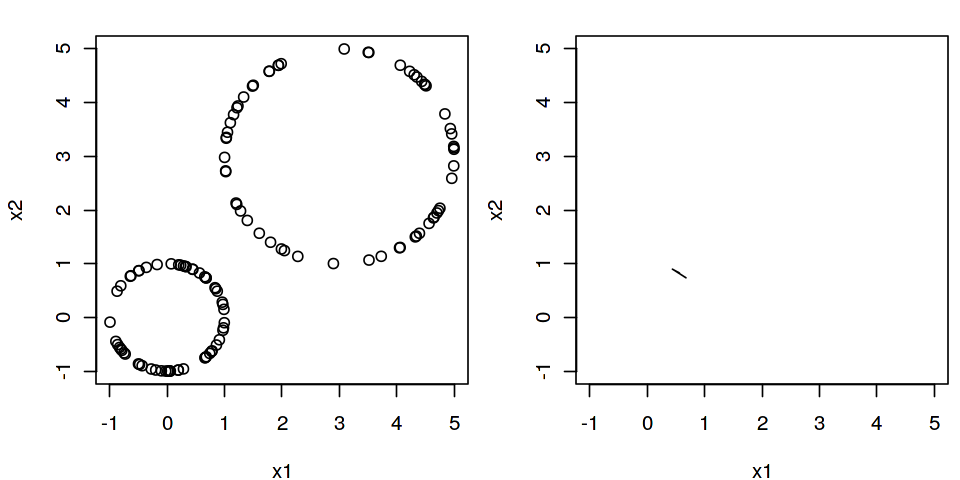

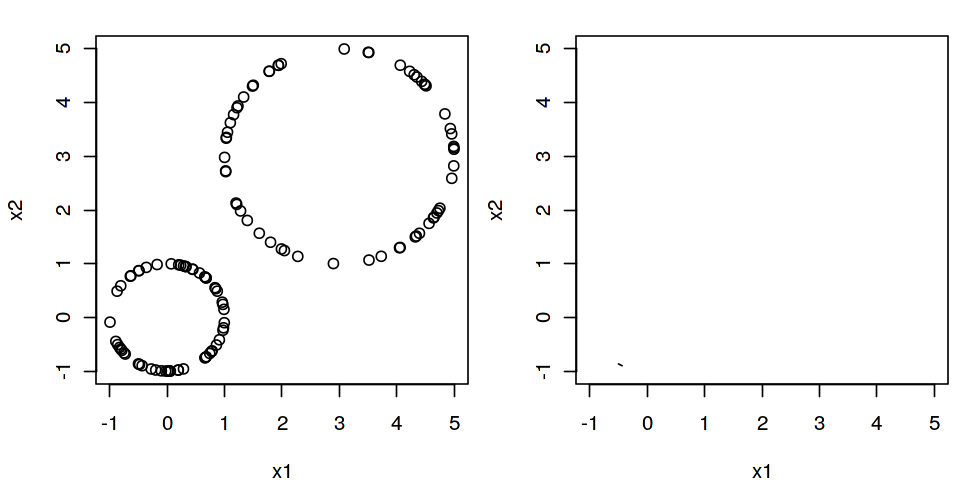

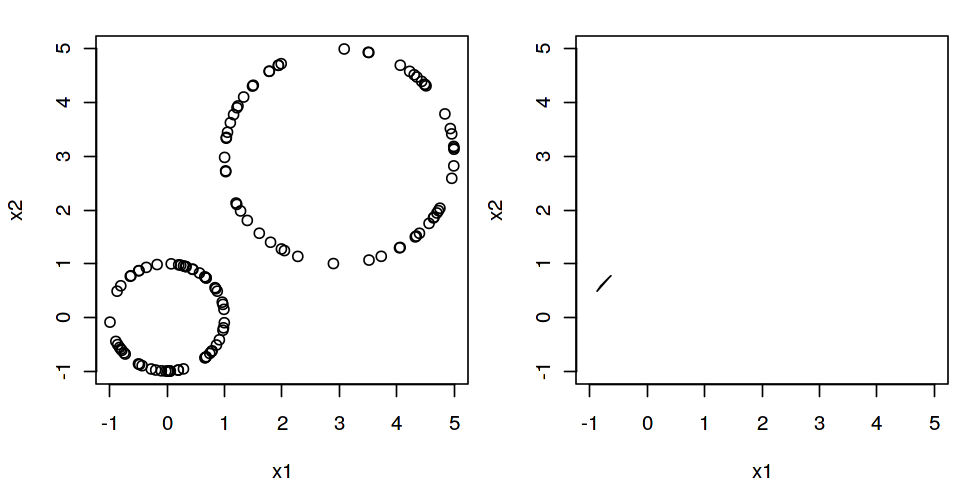

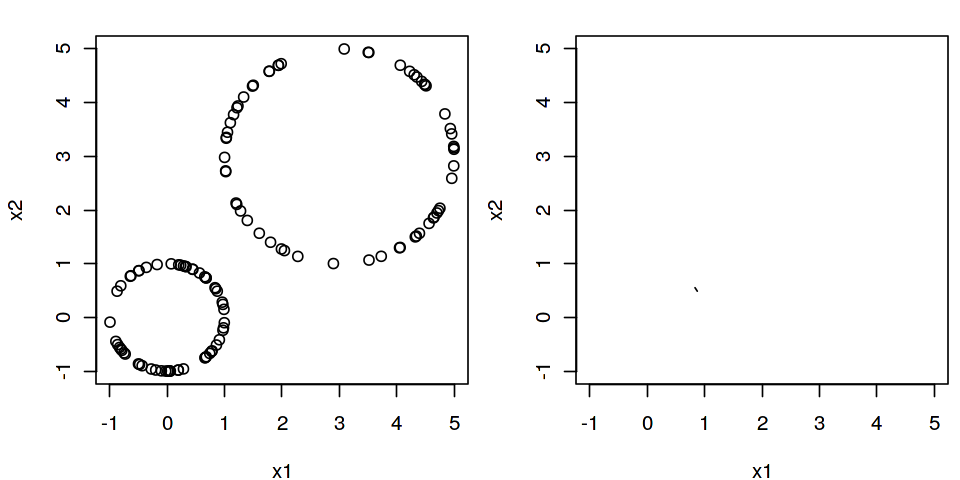

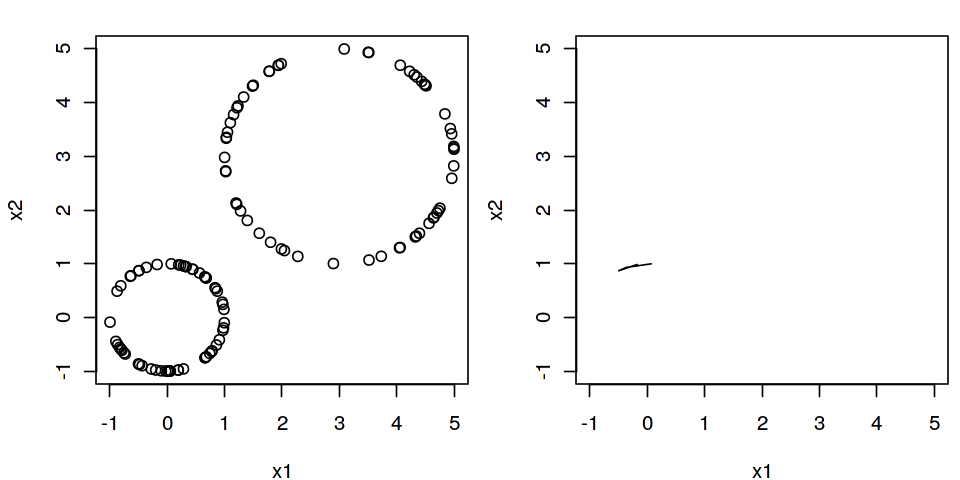

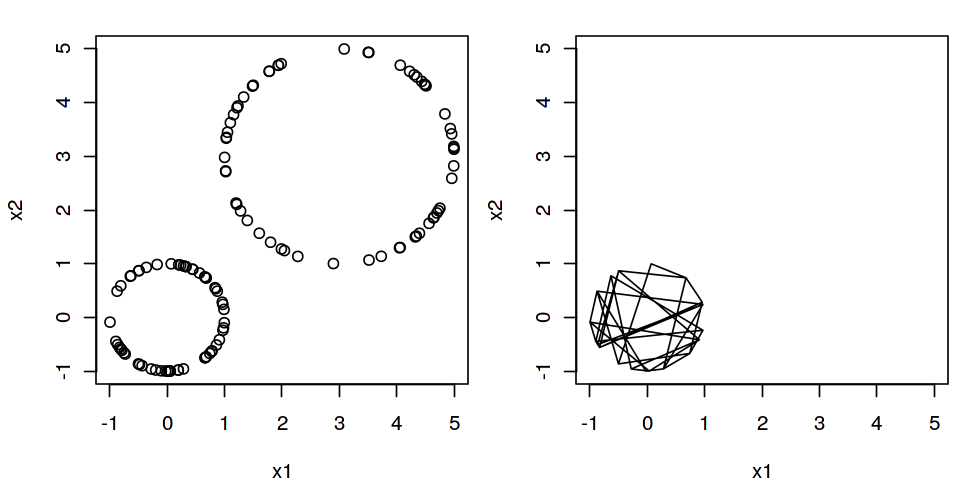

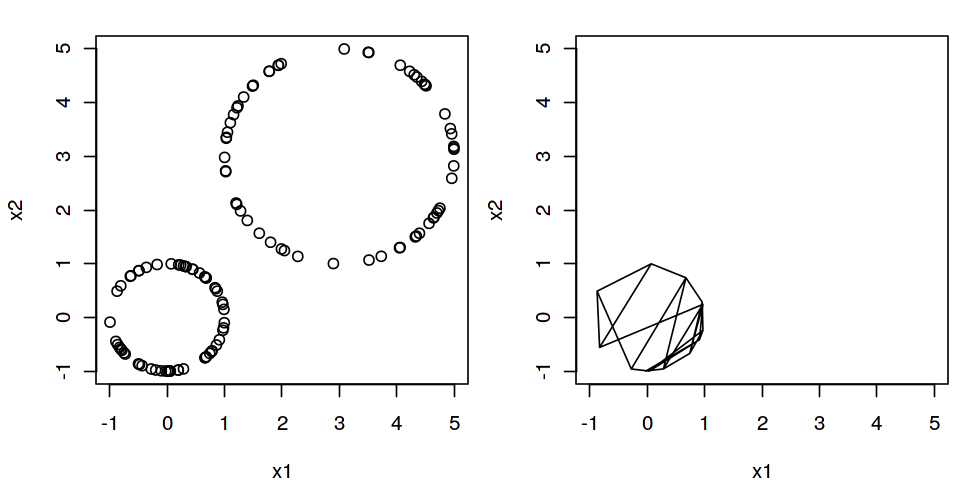

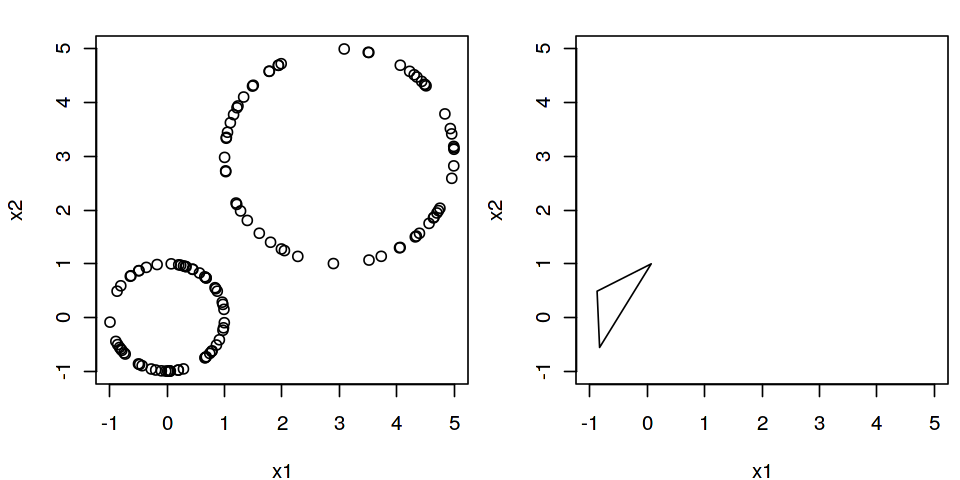

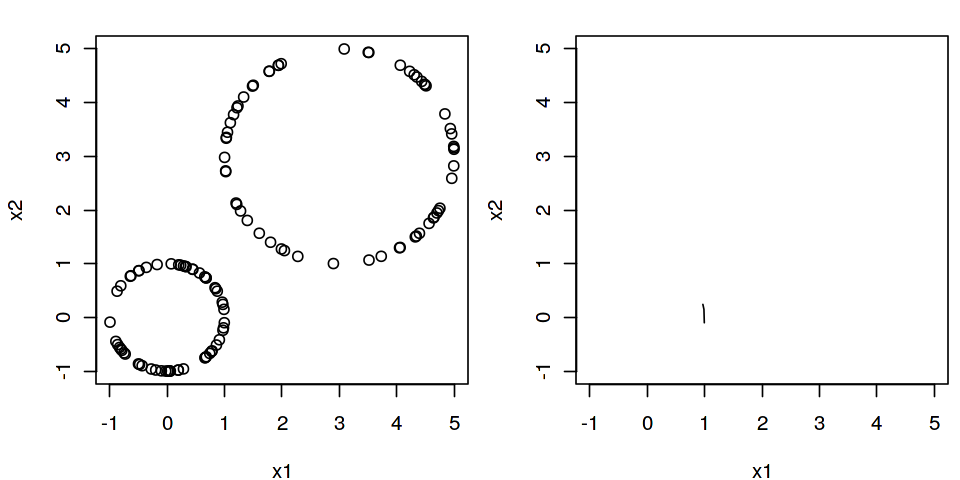

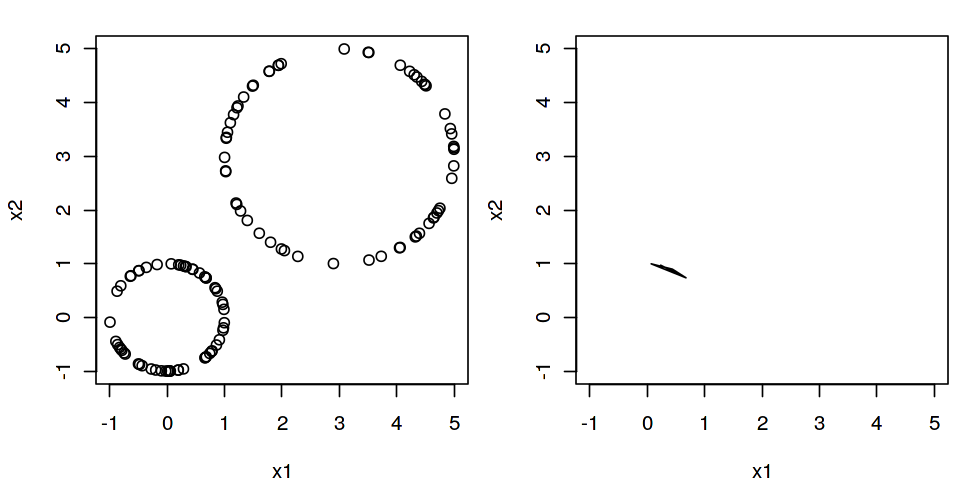

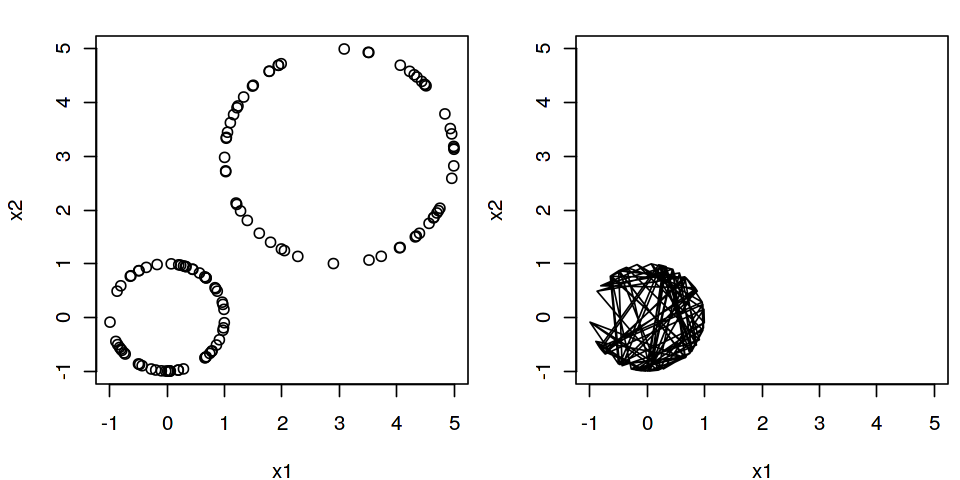

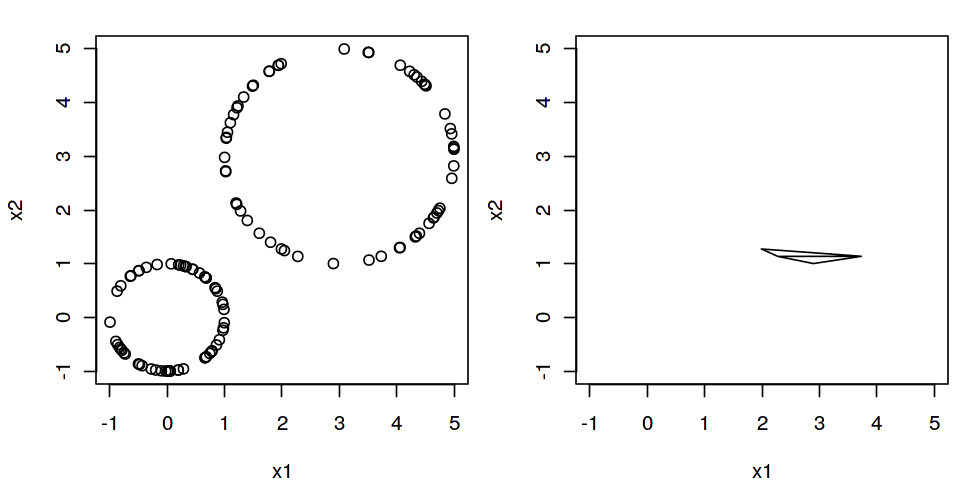

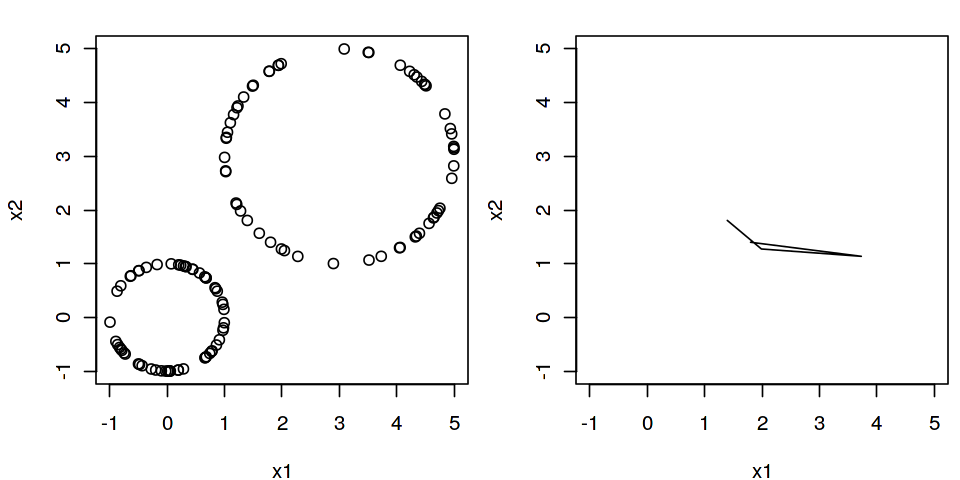

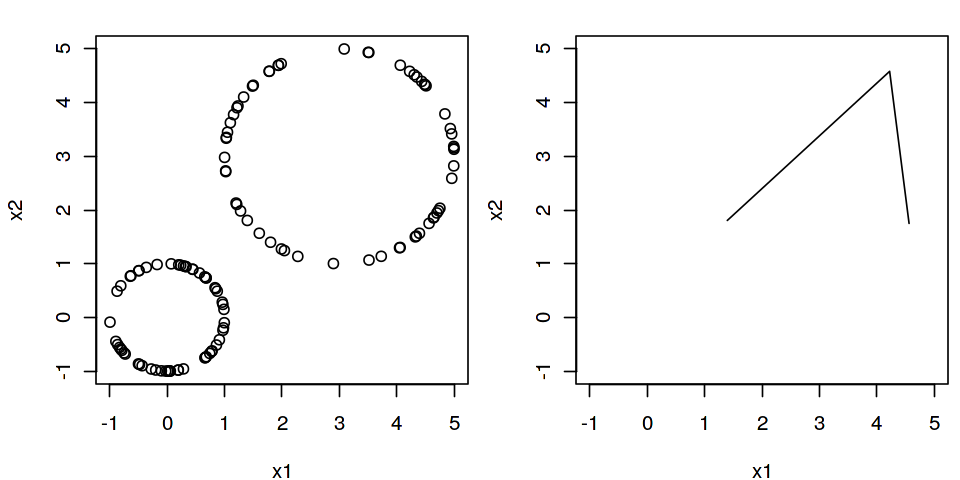

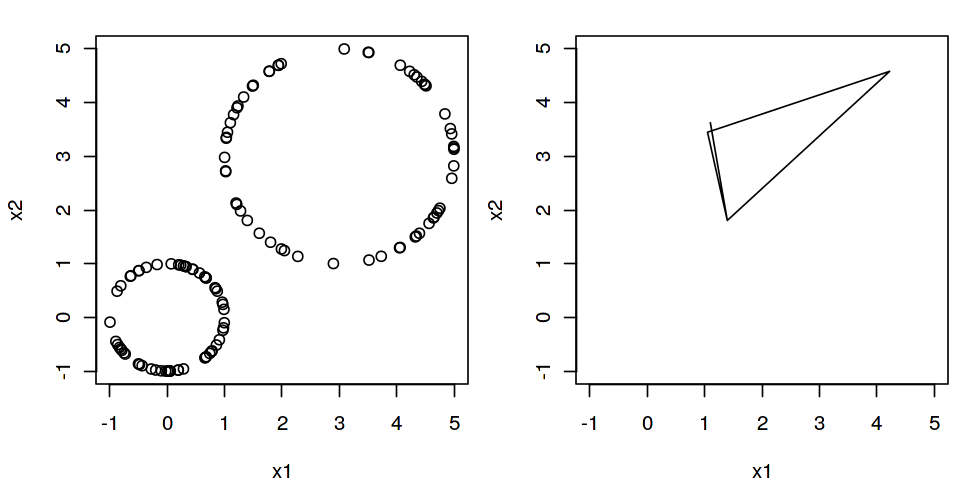

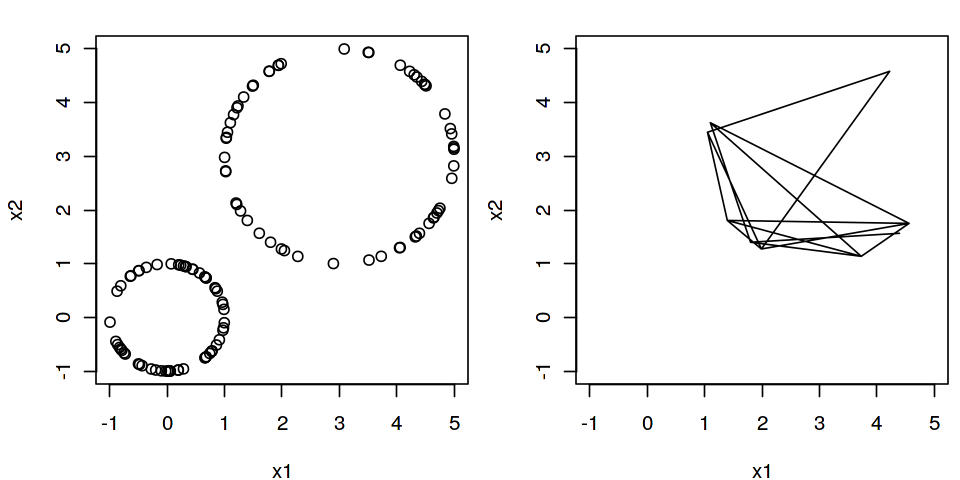

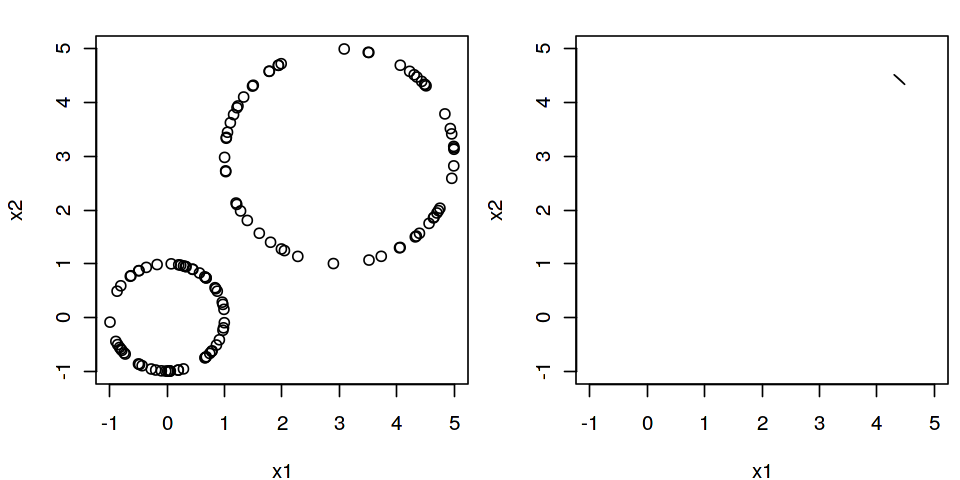

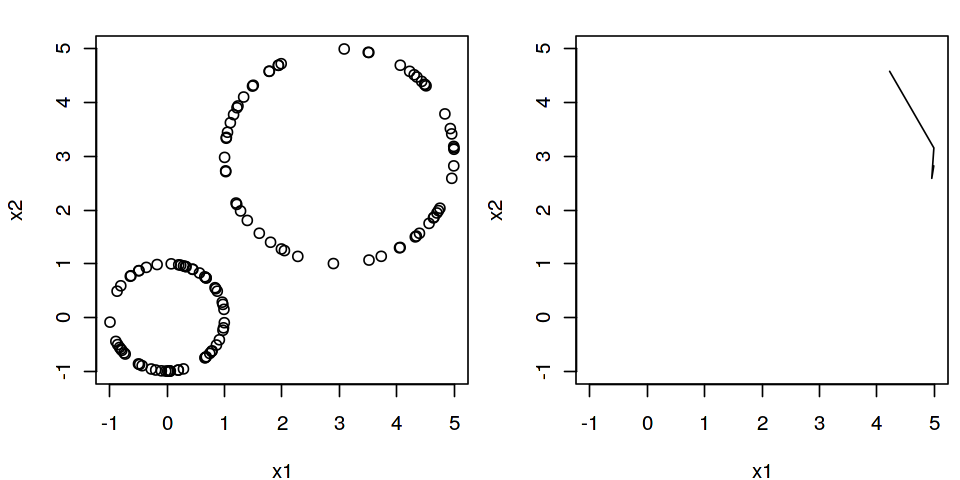

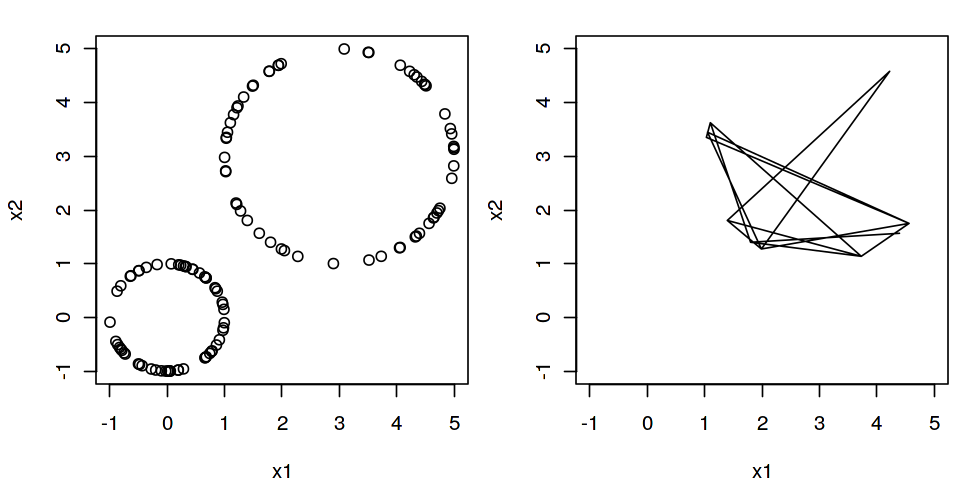

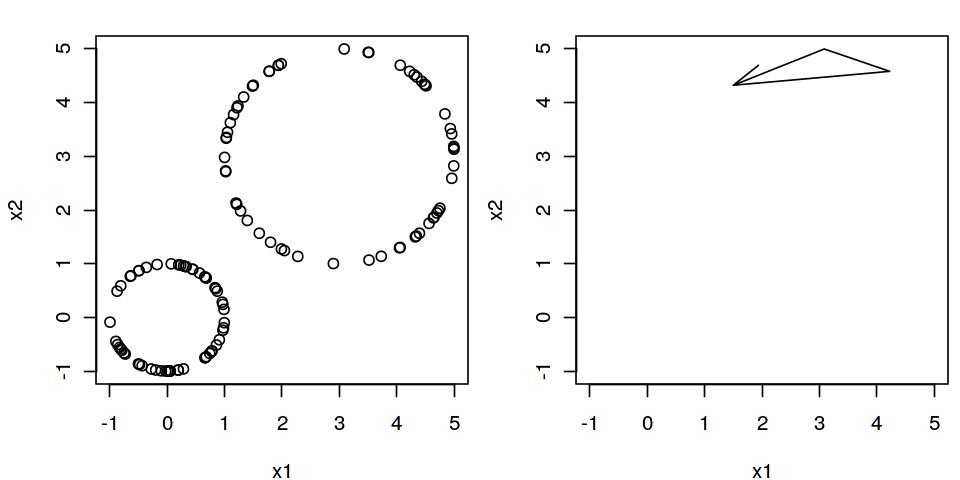

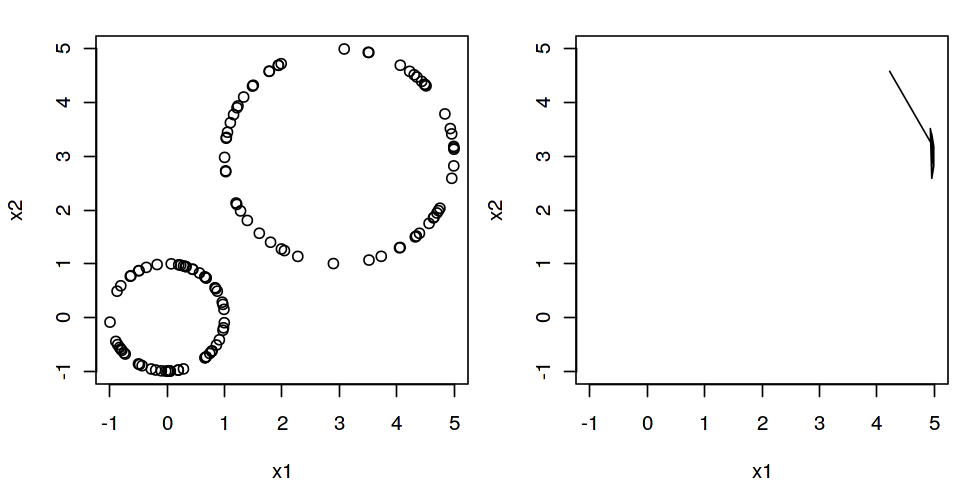

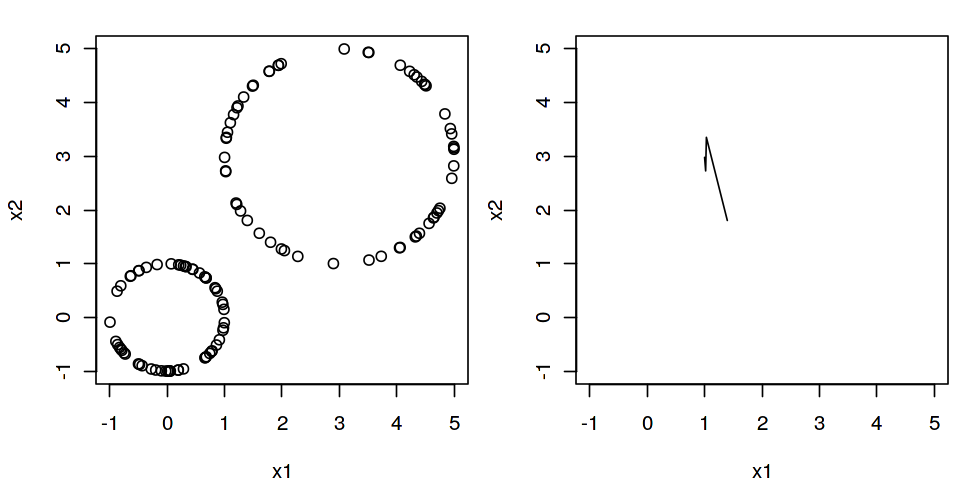

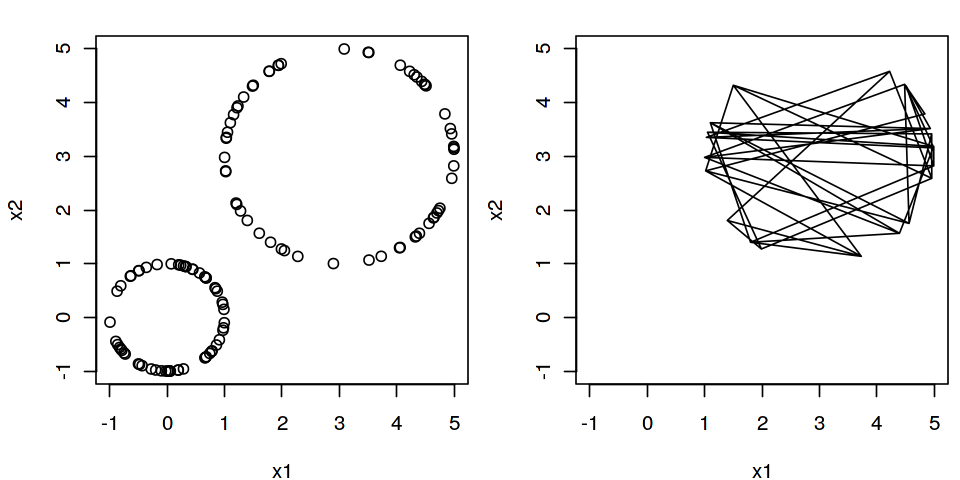

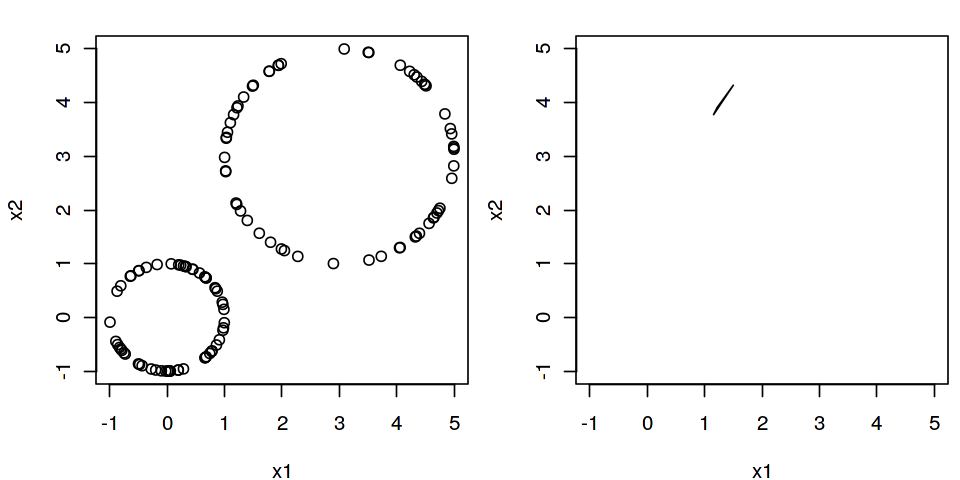

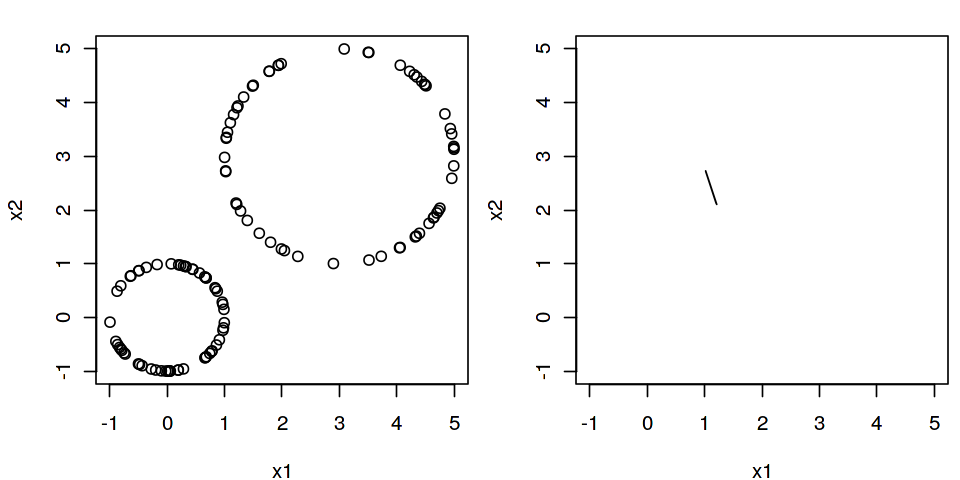

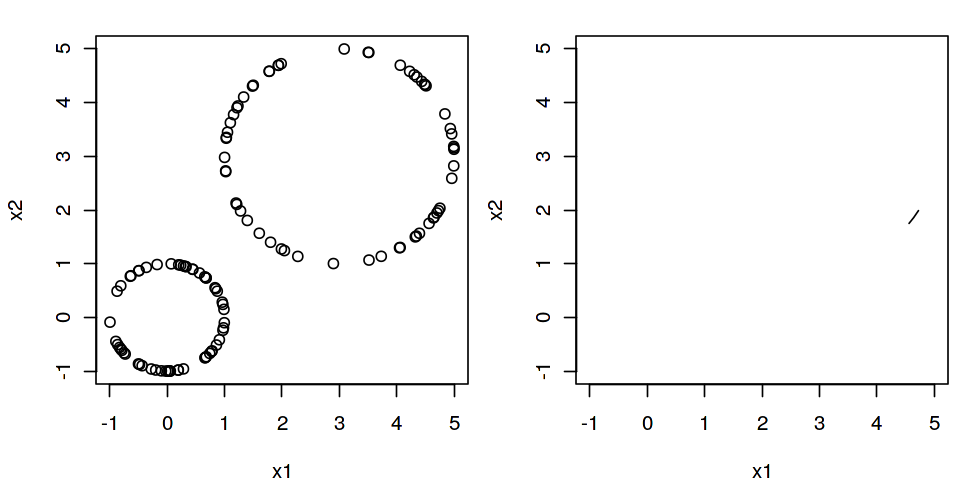

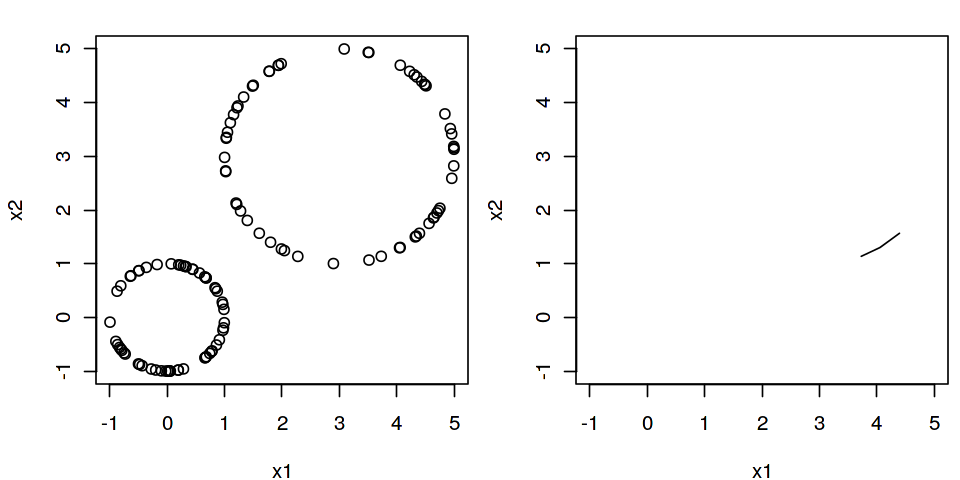

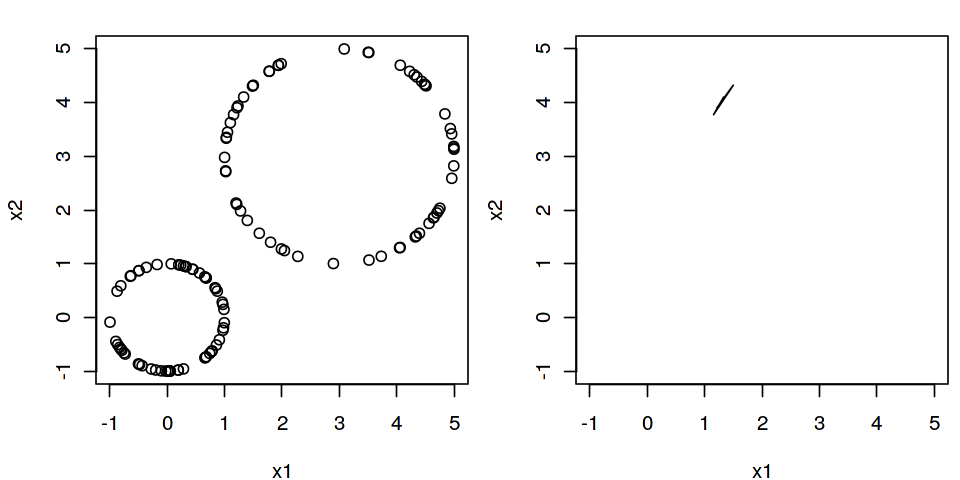

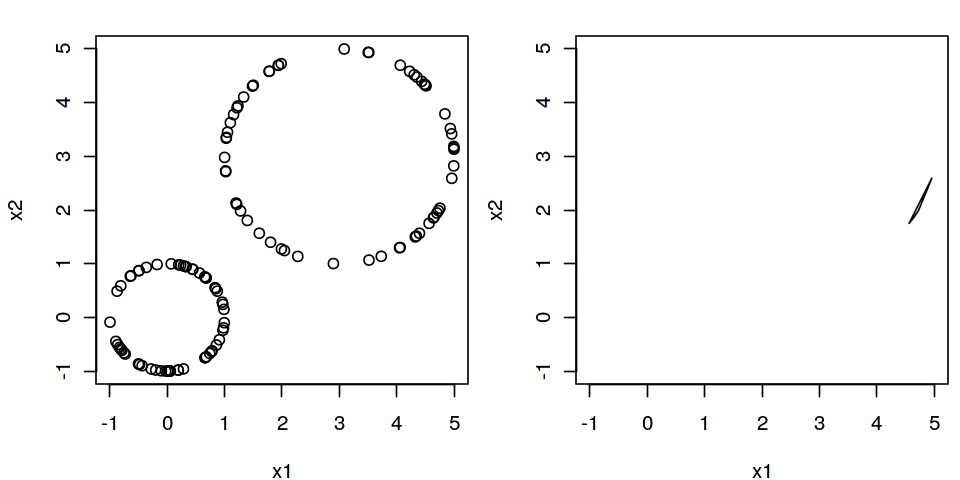

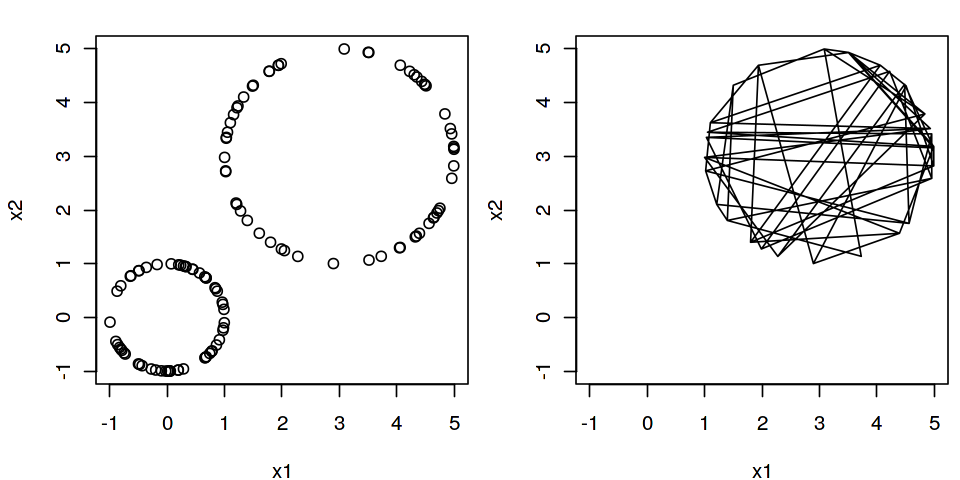

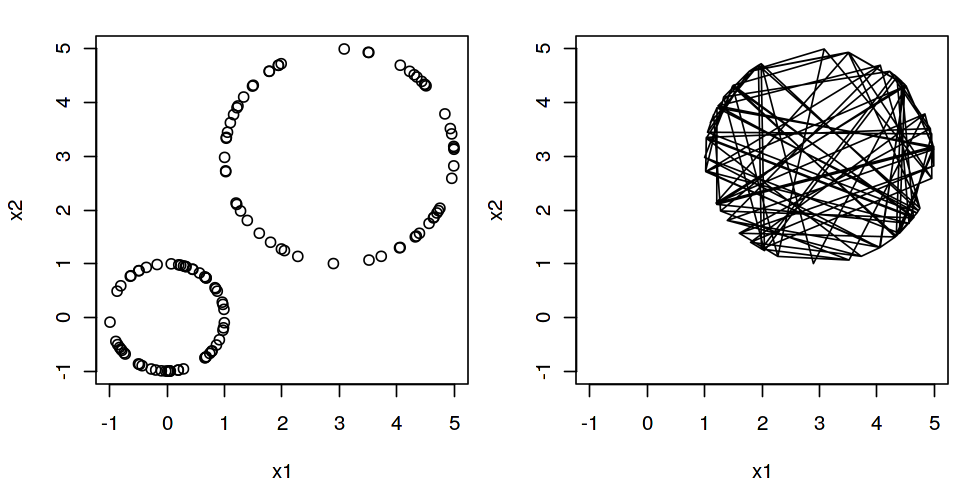

In [96]:
for (i in seq(1, length(DiagAlphaCmplx$cycleLocation))){
    
    ind = sorted_death_indices[i]
    homology = dim(DiagAlphaCmplx$cycleLocation[ind][[1]])[2]
    if (homology == 2){
        par(mfrow = c(1, 2), mai = c(0.8, 0.8, 0.3, 0.1))
        options(repr.plot.width=8,repr.plot.height=4)
        plot(Circles, xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
        plot(DiagAlphaCmplx$cycleLocation[ind][[1]][, ,1], 
             DiagAlphaCmplx$cycleLocation[ind][[1]][, ,2],
             type = 'l', xlab='x1',ylab='x2',xlim=c(-1,5),ylim = c(-1,5))
    }
    
}